In [1]:
# Setup and imports
import pandas as pd
import dask.dataframe as dd

In [2]:
# Template for loading profiles
profile_uri_template = (
    "s3://cellpainting-gallery/cpg0016-jump/"
    "{Metadata_Source}/workspace/profiles/"
    "{Metadata_Batch}/{Metadata_Plate}/{Metadata_Plate}.parquet"
)

In [3]:
# Load metadata
plates = pd.read_csv("datasets/metadata/plate.csv.gz")
wells = pd.read_csv("datasets/metadata/well.csv.gz")
orf = pd.read_csv("datasets/metadata/orf.csv.gz")
crispr = pd.read_csv("datasets/metadata/crispr.csv.gz", dtype={'Metadata_NCBI_Gene_ID': 'str'})

In [4]:
plates.Metadata_PlateType.value_counts()

COMPOUND          1729
ORF                251
CRISPR             148
TARGET2            141
DMSO                77
COMPOUND_EMPTY      20
POSCON8              8
TARGET1              4
Name: Metadata_PlateType, dtype: int64

Let's grab all the profiles from the CRISPR and ORF plates

In [5]:
selected_plates = plates[plates.Metadata_PlateType.isin({'ORF', 'CRISPR'})]

In [6]:
all_profiles = dd.read_parquet(
    [profile_uri_template.format_map(row) for _, row in selected_plates.iterrows()],
    storage_options={"anon": True}
)

In [7]:
all_profiles

,Metadata_Source,Metadata_Plate,Metadata_Well,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_BoundingBoxMaximum_X,Cells_AreaShape_BoundingBoxMaximum_Y,Cells_AreaShape_BoundingBoxMinimum_X,Cells_AreaShape_BoundingBoxMinimum_Y,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EquivalentDiameter,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,Cells_AreaShape_MaximumRadius,Cells_AreaShape_MeanRadius,Cells_AreaShape_MedianRadius,Cells_AreaShape_MinFeretDiameter,Cells_AreaShape_MinorAxisLength,Cells_AreaShape_Orientation,Cells_AreaShape_Perimeter,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,Cells_AreaShape_Zernike_4_2,Cells_AreaShape_Zernike_4_4,Cells_AreaShape_Zernike_5_1,Cells_AreaShape_Zernike_5_3,Cells_AreaShape_Zernike_5_5,Cells_AreaShape_Zernike_6_0,Cells_AreaShape_Zernike_6_2,Cells_AreaShape_Zernike_6_4,Cells_AreaShape_Zernike_6_6,Cells_AreaShape_Zernike_7_1,Cells_AreaShape_Zernike_7_3,Cells_AreaShape_Zernike_7_5,Cells_AreaShape_Zernike_7_7,Cells_AreaShape_Zernike_8_0,Cells_AreaShape_Zernike_8_2,Cells_AreaShape_Zernike_8_4,Cells_AreaShape_Zernike_8_6,Cells_AreaShape_Zernike_8_8,Cells_AreaShape_Zernike_9_1,Cells_AreaShape_Zernike_9_3,Cells_AreaShape_Zernike_9_5,Cells_AreaShape_Zernike_9_7,Cells_AreaShape_Zernike_9_9,Cells_Children_Cytoplasm_Count,Cells_Correlation_Correlation_AGP_DNA,Cells_Correlation_Correlation_AGP_ER,Cells_Correlation_Correlation_AGP_Mito,Cells_Correlation_Correlation_AGP_RNA,Cells_Correlation_Correlation_DNA_ER,Cells_Correlation_Correlation_DNA_Mito,Cells_Correlation_Correlation_DNA_RNA,Cells_Correlation_Correlation_ER_Mito,Cells_Correlation_Correlation_ER_RNA,Cells_Correlation_Correlation_Mito_RNA,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_AGP_ER,Cells_Correlation_K_AGP_Mito,Cells_Correlation_K_AGP_RNA,Cells_Correlation_K_DNA_AGP,Cells_Correlation_K_DNA_ER,Cells_Correlation_K_DNA_Mito,Cells_Correlation_K_DNA_RNA,Cells_Correlation_K_ER_AGP,Cells_Correlation_K_ER_DNA,Cells_Correlation_K_ER_Mito,Cells_Correlation_K_ER_RNA,Cells_Correlation_K_Mito_AGP,Cells_Correlation_K_Mito_DNA,Cells_Correlation_K_Mito_ER,Cells_Correlation_K_Mito_RNA,Cells_Correlation_K_RNA_AGP,Cells_Correlation_K_RNA_DNA,Cells_Correlation_K_RNA_ER,Cells_Correlation_K_RNA_Mito,Cells_Correlation_Manders_AGP_DNA,Cells_Correlation_Manders_AGP_ER,Cells_Correlation_Manders_AGP_Mito,Cells_Correlation_Manders_AGP_RNA,Cells_Correlation_Manders_DNA_AGP,Cells_Correlation_Manders_DNA_ER,Cells_Correlation_Manders_DNA_Mito,Cells_Correlation_Manders_DNA_RNA,Cells_Correlation_Manders_ER_AGP,Cells_Correlation_Manders_ER_DNA,Cells_Correlation_Manders_ER_Mito,Cells_Correlation_Manders_ER_RNA,Cells_Correlation_Manders_Mito_AGP,Cells_Correlation_Manders_Mito_DNA,Cells_Correlation_Manders_Mito_ER,Cells_Correlation_Manders_Mito_RNA,Cells_Correlation_Manders_RNA_AGP,Cells_Correlation_Manders_RNA_DNA,Cells_Correlation_Manders_RNA_ER,Cells_Correlation_Manders_RNA_Mito,Cells_Correlation_Overlap_AGP_DNA,Cells_Correlation_Overlap_AGP_ER,Cells_Correlation_Overlap_AGP_Mito,Cells_Correlation_Overlap_AGP_RNA,Cells_Correlation_Overlap_DNA_ER,Cells_Correlation_Overlap_DNA_Mito,Cells_Correlation_Overlap_DNA_RNA,Cells_Correlation_Overlap_ER_Mito,Cells_Correlation_Overlap_ER_RNA,Cells_Correlation_Overlap_Mito_RNA,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_AGP_ER,Cells_Correlation_RWC_AGP_Mito,Cells_Correlation_RWC_AGP_RNA,Cells_Correlation_RWC_DNA_AGP,Cells_Correlation_RWC_DNA_ER,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_DNA_RNA,Cells_Correlation_RWC_ER_AGP,Cells_Correlation_RWC_ER_DNA,Cells_Correlation_RWC_ER_Mito,Cells_Correlation_RWC_ER_RNA,Cells_Correlation_RWC_Mito_AGP,Cells_Correlation_R

Wells (and profiles) are identified by their `Metadata_{Source, Plate, Well}` triple.

We need to attach metadata about the genetic perturbation to each well.

In [10]:
orf

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type
0,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt
1,JCP2022_900003,ccsbBroad304_00002,ORF005388.1_TRC304.1,pLX_304,NM_001088.3,AANAT,15,9606,aralkylamine N-acetyltransferase,100.0,621.0,trt
2,JCP2022_900004,ccsbBroad304_00003,ORF003876.1_TRC304.1,pLX_304,NM_000663.4,ABAT,18,9606,4-aminobutyrate aminotransferase,100.0,1500.0,trt
3,JCP2022_900005,ccsbBroad304_00007,ORF004679.1_TRC304.1,pLX_304,NM_000018.4,ACADVL,37,9606,acyl-CoA dehydrogenase very long chain,100.0,1965.0,trt
4,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,1584.0,trt
...,...,...,...,...,...,...,...,...,...,...,...,...
15137,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,negcon
15138,JCP2022_915129,ccsbBroad304_99988,ORFC00002.1_TRC304.1,pLX_304,HcRed.1,HcRed,HcRed,CONTROL,NaN,NaN,824.0,negcon
15139,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,1650.0,negcon
15140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon


For ORF perturbations we keep the gene ID, Symbol, and prepend a string to treatment to identify that it's an ORF perturbation

In [9]:
orf_meta = orf[['Metadata_JCP2022', 'Metadata_Symbol', 'Metadata_NCBI_Gene_ID']]
orf_meta['Metadata_Perturbation'] = orf.Metadata_pert_type.apply(lambda x: f'ORF-{x}')
orf_meta

/tmp/ipykernel_3461/3138304948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orf_meta['Metadata_Perturbation'] = orf.Metadata_pert_type.apply(lambda x: f'ORF-{x}')


,Metadata_JCP2022,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Perturbation
0,JCP2022_900002,NAT1,9,ORF-trt
1,JCP2022_900003,AANAT,15,ORF-trt
2,JCP2022_900004,ABAT,18,ORF-trt
3,JCP2022_900005,ACADVL,37,ORF-trt
4,JCP2022_900006,ASIC1,41,ORF-trt
...,...,...,...,...
15137,JCP2022_915128,BFP,BFP,ORF-negcon
15138,JCP2022_915129,HcRed,HcRed,ORF-negcon
15139,JCP2022_915130,LUCIFERASE,LUCIFERASE,ORF-negcon
15140,JCP2022_915131,LacZ,LacZ,ORF-negcon


In [10]:
orf_meta.Metadata_Perturbation.value_counts()

ORF-trt       15137
ORF-negcon        4
ORF-poscon        1
Name: Metadata_Perturbation, dtype: int64

In [11]:
crispr

,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol
0,JCP2022_800001,NaN,no-guide
1,JCP2022_800002,NaN,non-targeting
2,JCP2022_800003,2.0,A2M
3,JCP2022_800004,127550.0,A3GALT2
4,JCP2022_800005,53947.0,A4GALT
...,...,...,...
7972,JCP2022_807973,54925.0,ZSCAN32
7973,JCP2022_807974,201516.0,ZSCAN4
7974,JCP2022_807975,79149.0,ZSCAN5A
7975,JCP2022_807976,7746.0,ZSCAN9


For CRISPR perturbations we keep the gene ID and Symbol, and infer the perturbation type. 

In [14]:
crispr_meta = crispr
crispr_meta['Metadata_Perturbation'] = crispr.Metadata_Symbol.apply(lambda x : f'CRISPR-{x}' if x in {'no-guide', 'non-targeting'} else 'CRISPR-trt')
crispr_meta

,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol,Metadata_Perturbation
0,JCP2022_800001,NaN,no-guide,CRISPR-no-guide
1,JCP2022_800002,NaN,non-targeting,CRISPR-non-targeting
2,JCP2022_800003,2.0,A2M,CRISPR-trt
3,JCP2022_800004,127550.0,A3GALT2,CRISPR-trt
4,JCP2022_800005,53947.0,A4GALT,CRISPR-trt
...,...,...,...,...
7972,JCP2022_807973,54925.0,ZSCAN32,CRISPR-trt
7973,JCP2022_807974,201516.0,ZSCAN4,CRISPR-trt
7974,JCP2022_807975,79149.0,ZSCAN5A,CRISPR-trt
7975,JCP2022_807976,7746.0,ZSCAN9,CRISPR-trt


# Scratch zone

In [9]:
wells

,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_JCP2022
0,source_1,UL000081,A02,JCP2022_033924
1,source_1,UL000081,A03,JCP2022_085227
2,source_1,UL000081,A04,JCP2022_033924
3,source_1,UL000081,A05,JCP2022_047857
4,source_1,UL000081,A06,JCP2022_072229
...,...,...,...,...
1096069,source_9,GR00004421,Z44,JCP2022_999999
1096070,source_9,GR00004421,Z45,JCP2022_999999
1096071,source_9,GR00004421,Z46,JCP2022_999999
1096072,source_9,GR00004421,Z47,JCP2022_033924


In [24]:
orf.Metadata_pert_type.value_counts()

trt       15137
negcon        4
poscon        1
Name: Metadata_pert_type, dtype: int64

In [11]:
crispr.Metadata_Symbol.isna().any()

False

In [12]:
big_df = plates.merge(wells, how='left', on=['Metadata_Source', 'Metadata_Plate'])

big_df

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_PlateType,Metadata_Well,Metadata_JCP2022
0,source_1,Batch1_20221004,UL000109,COMPOUND_EMPTY,A02,JCP2022_033924
1,source_1,Batch1_20221004,UL000109,COMPOUND_EMPTY,A03,JCP2022_085227
2,source_1,Batch1_20221004,UL000109,COMPOUND_EMPTY,A04,JCP2022_033924
3,source_1,Batch1_20221004,UL000109,COMPOUND_EMPTY,A05,JCP2022_033924
4,source_1,Batch1_20221004,UL000109,COMPOUND_EMPTY,A06,JCP2022_033924
...,...,...,...,...,...,...
1096069,source_9,20211103-Run16,GR00004421,COMPOUND,Z44,JCP2022_999999
1096070,source_9,20211103-Run16,GR00004421,COMPOUND,Z45,JCP2022_999999
1096071,source_9,20211103-Run16,GR00004421,COMPOUND,Z46,JCP2022_999999
1096072,source_9,20211103-Run16,GR00004421,COMPOUND,Z47,JCP2022_033924


In [13]:
# Which plate types contain ORF samples?
big_df[big_df.Metadata_JCP2022.isin(orf.Metadata_JCP2022)].Metadata_PlateType.value_counts()

ORF    86699
Name: Metadata_PlateType, dtype: int64

In [14]:
# Which plate types contain CRISPR samples?
big_df[big_df.Metadata_JCP2022.isin(crispr.Metadata_JCP2022)].Metadata_PlateType.value_counts()

CRISPR    51192
Name: Metadata_PlateType, dtype: int64

In [15]:
# Let's grab all the CRISPR + ORF samples and get their plate metadata
genetic_samples = big_df.merge(
    pd.concat([orf, crispr], ignore_index=True),
    how='right',
    on=['Metadata_JCP2022']
)
genetic_samples

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_PlateType,Metadata_Well,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type
0,source_4,2021_06_21_Batch7,BR00125170,ORF,E18,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt
1,source_4,2021_06_21_Batch7,BR00125171,ORF,E18,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt
2,source_4,2021_06_21_Batch7,BR00125172,ORF,E18,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt
3,source_4,2021_06_21_Batch7,BR00125173,ORF,E18,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt
4,source_4,2021_06_21_Batch7,BR00125174,ORF,E18,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137896,source_13,20220914_Run1,CP-CC9-R1-25,CRISPR,H09,JCP2022_807977,NaN,NaN,NaN,NaN,ZSWIM2,151112.0,NaN,NaN,NaN,NaN,NaN
137897,source_13,20221009_Run2,CP-CC9-R2-25,CRISPR,H09,JCP2022_807977,NaN,NaN,NaN,NaN,ZSWIM2,151112.0,NaN,NaN,NaN,NaN,NaN
137898,source_13,20221017_Run3,CP-CC9-R3-25,CRISPR,H09,JCP2022_807977,NaN,NaN,NaN,NaN,ZSWIM2,151112.0,NaN,NaN,NaN,NaN,NaN
137899,source_13,20221024_Run4,CP-CC9-R4-25,CRISPR,H09,JCP2022_807977,NaN,NaN,NaN,NaN,ZSWIM2,151112.0,NaN,NaN,NaN,NaN,NaN


In [16]:
genetic_samples.Metadata_pert_type.value_counts()

trt       80791
negcon     3892
poscon     2026
Name: Metadata_pert_type, dtype: int64

In [17]:
genetic_samples[genetic_samples.Metadata_NCBI_Gene_ID.isna()]

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_PlateType,Metadata_Well,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type
66601,source_4,2021_07_26_Batch9,BR00126046,ORF,O13,JCP2022_912824,ccsbBroad304_13757,ORF000140.1_TRC304.1,pLX_304,NaN,NaN,NaN,NaN,NaN,NaN,129.0,trt
66602,source_4,2021_07_26_Batch9,BR00126047,ORF,O13,JCP2022_912824,ccsbBroad304_13757,ORF000140.1_TRC304.1,pLX_304,NaN,NaN,NaN,NaN,NaN,NaN,129.0,trt
66603,source_4,2021_07_26_Batch9,BR00126048,ORF,O13,JCP2022_912824,ccsbBroad304_13757,ORF000140.1_TRC304.1,pLX_304,NaN,NaN,NaN,NaN,NaN,NaN,129.0,trt
66604,source_4,2021_07_26_Batch9,BR00126049,ORF,O13,JCP2022_912824,ccsbBroad304_13757,ORF000140.1_TRC304.1,pLX_304,NaN,NaN,NaN,NaN,NaN,NaN,129.0,trt
66605,source_4,2021_07_26_Batch9,BR00126050,ORF,O13,JCP2022_912824,ccsbBroad304_13757,ORF000140.1_TRC304.1,pLX_304,NaN,NaN,NaN,NaN,NaN,NaN,129.0,trt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94182,source_13,20221120_Run6,CP-CC9-R8-02,CRISPR,I23,JCP2022_800002,NaN,NaN,NaN,NaN,non-targeting,NaN,NaN,NaN,NaN,NaN,NaN
94183,source_13,20221120_Run6,CP-CC9-R8-02,CRISPR,J02,JCP2022_800002,NaN,NaN,NaN,NaN,non-targeting,NaN,NaN,NaN,NaN,NaN,NaN
94184,source_13,20221120_Run6,CP-CC9-R8-02,CRISPR,L23,JCP2022_800002,NaN,NaN,NaN,NaN,non-targeting,NaN,NaN,NaN,NaN,NaN,NaN
94185,source_13,20221120_Run6,CP-CC9-R8-02,CRISPR,M02,JCP2022_800002,NaN,NaN,NaN,NaN,non-targeting,NaN,NaN,NaN,NaN,NaN,NaN


Pick a random CRISPR plate to explore

In [18]:
# plate = plates[plates.Metadata_PlateType == 'CRISPR'].sample(1)
plate = plates[plates.Metadata_Plate == 'CP-CC9-R5-23']
plate

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_PlateType
592,source_13,20221109_Run5,CP-CC9-R5-23,CRISPR


Looking at the detailed metadata:

In [19]:
meta_s3_path = metadata_uri_template.format_map(plate.iloc[0])
detailed_metadata = pd.read_parquet(meta_s3_path, storage_options={"anon": True})
detailed_metadata

FileNotFoundError: cellpainting-gallery/cpg0016-jump/source_13/workspace/metadata/20221109_Run5/CP-CC9-R5-23/CP-CC9-R5-23.parquet

In [20]:
meta_s3_path

's3://cellpainting-gallery/cpg0016-jump/source_13/workspace/metadata/20221109_Run5/CP-CC9-R5-23/CP-CC9-R5-23.parquet'

Looking at the profiles:

In [3]:
s3_path = profile_uri_template.format_map(plate.iloc[0])

NameError: name 'plate' is not defined

In [ ]:
profiles = pd.read_parquet(s3_path, storage_options={"anon": True})

In [ ]:
profiles

,Metadata_Source,Metadata_Plate,Metadata_Well,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_BoundingBoxMaximum_X,Cells_AreaShape_BoundingBoxMaximum_Y,Cells_AreaShape_BoundingBoxMinimum_X,Cells_AreaShape_BoundingBoxMinimum_Y,Cells_AreaShape_Center_X,...,Nuclei_Texture_Variance_RNA_10_02_256,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256
0,source_13,CP-CC9-R5-23,A01,2564.646154,4802.280342,668.487179,570.274481,600.166056,503.239316,633.838598,...,6.547658,6.232722,5.985055,6.135418,5.993420,6.132523,6.216933,6.433744,6.229385,6.439193
1,source_13,CP-CC9-R5-23,A02,3170.828715,6107.156891,675.727960,567.964016,599.186038,492.998920,636.943843,...,11.178547,10.757525,10.122509,10.355115,10.143746,10.373022,10.503368,10.882839,10.529324,10.906502
2,source_13,CP-CC9-R5-23,A03,3565.356221,6956.491885,644.444028,555.205160,561.962963,476.180191,602.788444,...,14.429889,13.996270,13.114643,13.419398,13.137789,13.417798,13.595718,14.127519,13.635929,14.128808
3,source_13,CP-CC9-R5-23,A04,3247.135221,6205.939823,653.034690,586.986549,575.189735,511.045664,613.639668,...,12.835166,12.277337,11.707850,11.955516,11.699445,11.993111,12.148838,12.584092,12.146463,12.628819
4,source_13,CP-CC9-R5-23,A05,3682.275010,7109.566077,666.755043,576.156031,584.368876,495.899135,625.165154,...,11.330945,10.972891,10.336653,10.577284,10.347326,10.564972,10.708535,11.096187,10.720598,11.060719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,source_13,CP-CC9-R5-23,P20,3809.685410,7492.009695,655.526418,566.932622,572.456617,484.753272,613.558712,...,8.619560,8.412276,7.839974,8.017215,7.832912,8.000732,8.119536,8.398918,8.124440,8.396646
380,source_13,CP-CC9-R5-23,P21,3623.604569,7007.339631,655.444200,555.888840,574.447715,475.467047,614.415720,...,9.617179,9.184005,8.671703,8.891198,8.671270,8.879872,9.028685,9.386534,9.026217,9.361639
381,source_13,CP-CC9-R5-23,P22,3664.166403,7129.243478,677.927273,556.443083,595.813834,475.109486,636.400757,...,7.223888,6.944500,6.568336,6.733048,6.574163,6.716938,6.820257,7.076138,6.835988,7.050345
382,source_13,CP-CC9-R5-23,P23,2477.854499,4542.050197,687.463567,571.596114,620.873467,506.443673,653.671140,...,6.637722,6.283346,6.072803,6.236900,6.078185,6.233929,6.320482,6.536631,6.331400,6.537714


In [ ]:
# We don't want to deal with missing data yet
profiles.columns[profiles.isna().any()]

Index(['Cells_AreaShape_FormFactor', 'Cytoplasm_AreaShape_FormFactor'], dtype='object')

In [ ]:
# Get subset of full profile columns
feature_cols = profiles.columns[~profiles.columns.str.startswith('Metadata') & ~profiles.isna().any()]

PCA plot of well profiles in the plate:

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)

profile_mat = profiles[feature_cols].to_numpy()

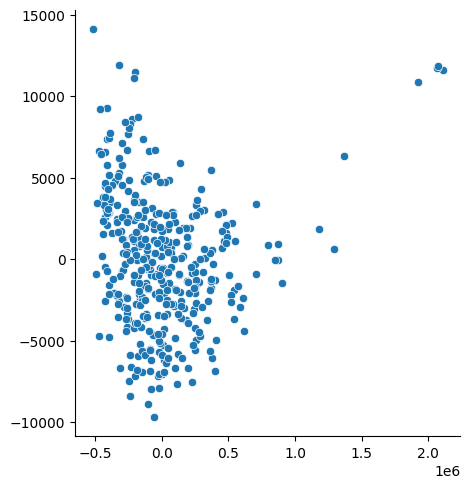

In [ ]:
decomp = pca.fit_transform(profile_mat)

sns.relplot(x=decomp[:,0], y=decomp[:,1])

In [ ]:
# Check our well genes
plate_wells = wells[wells.Metadata_Plate == 'CP-CC9-R5-23'].merge(crispr, how='left', on='Metadata_JCP2022')
plate_wells.Metadata_Symbol.value_counts(sort=True, dropna=False)

NaN              40
no-guide         11
non-targeting    10
PLK1              4
SCAND1            1
                 ..
TAF5L             1
IRX1              1
NFATC2            1
BRD8              1
HOXB4             1
Name: Metadata_Symbol, Length: 323, dtype: int64

In [ ]:
plate_wells['tag'] = 'knockdown'
plate_wells.tag[plate_wells.Metadata_Symbol.isna()] = 'none'
selection = plate_wells.Metadata_Symbol.isin({'no-guide', 'non-targeting'})
plate_wells.tag[selection] = plate_wells.Metadata_Symbol[selection]

plate_wells

/tmp/ipykernel_223/3661390046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_wells.tag[plate_wells.Metadata_Symbol.isna()] = 'none'
/tmp/ipykernel_223/3661390046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plate_wells.tag[selection] = plate_wells.Metadata_Symbol[selection]


,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol,tag
0,source_13,CP-CC9-R5-23,A01,JCP2022_085227,NaN,NaN,none
1,source_13,CP-CC9-R5-23,A02,JCP2022_800002,NaN,non-targeting,non-targeting
2,source_13,CP-CC9-R5-23,A03,JCP2022_803144,8091.0,HMGA2,knockdown
3,source_13,CP-CC9-R5-23,A04,JCP2022_803160,6927.0,HNF1A,knockdown
4,source_13,CP-CC9-R5-23,A05,JCP2022_800266,23394.0,ADNP,knockdown
...,...,...,...,...,...,...,...
379,source_13,CP-CC9-R5-23,P20,JCP2022_802185,2101.0,ESRRA,knockdown
380,source_13,CP-CC9-R5-23,P21,JCP2022_803163,3174.0,HNF4G,knockdown
381,source_13,CP-CC9-R5-23,P22,JCP2022_803185,3214.0,HOXB4,knockdown
382,source_13,CP-CC9-R5-23,P23,JCP2022_800001,NaN,no-guide,no-guide


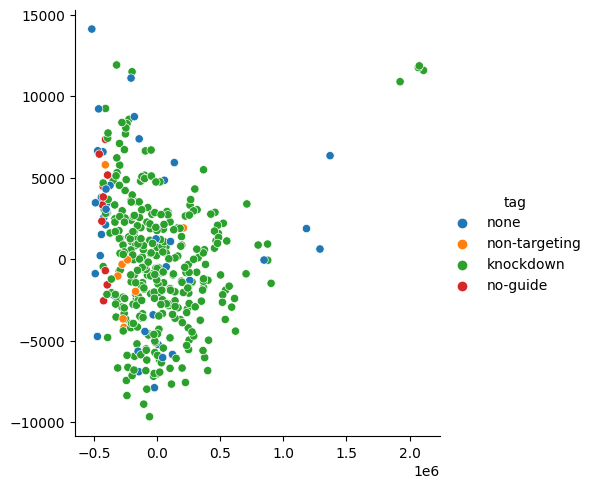

In [ ]:
tagged_profiles = profiles.merge(
    plate_wells[['Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'tag']],
    how='left',
    on=['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']
)

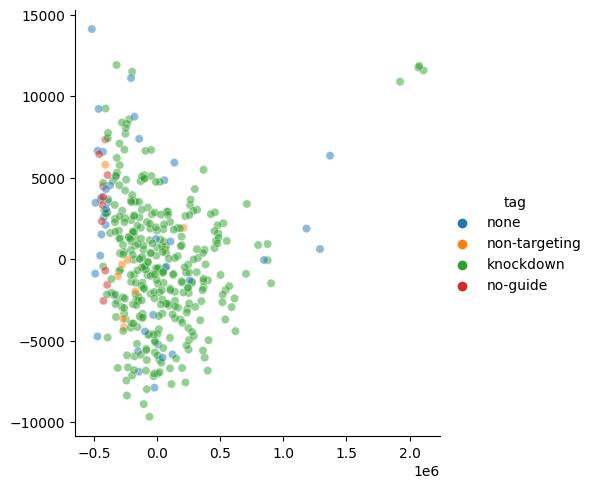

In [ ]:
sns.relplot(x=decomp[:,0], y=decomp[:,1], hue=tagged_profiles.tag, alpha=.5)